Get Imports + Initialize GPU

In [16]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd
import sklearn.model_selection as sk 
import PIL 
import os

In [2]:
# Set up the GPU
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

Prepare Data

In [3]:
# Import the data that is needed from the CSV File
train_data = pd.read_csv("training.csv", usecols = ["left_eye_center_x", "left_eye_center_y", "right_eye_center_x", "right_eye_center_y", "nose_tip_y", "nose_tip_x", "Image"])

In [4]:
# Show the first five rows in the dataframe
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,nose_tip_x,nose_tip_y,Image
0,66.033564,39.002274,30.227008,36.421678,44.420571,57.066803,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,48.206298,55.660936,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,47.557263,53.538947,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,51.885078,54.166539,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,43.299534,64.889521,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
# Understand the data
train_data.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,nose_tip_x,nose_tip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,7049.000000,7049.000000
mean,66.359021,37.651234,30.306102,37.976943,48.374186,62.715884
std,3.448233,3.152926,3.083230,3.033621,4.280038,5.720567
min,22.763345,1.616512,0.686592,4.091264,12.944699,17.932414
25%,65.082895,35.900451,28.783339,36.327681,46.602370,59.292697
50%,66.497566,37.528055,30.251378,37.813273,48.424713,63.451421
75%,68.024752,39.258449,31.768334,39.566729,50.330437,66.492686
max,94.689280,80.502649,85.039381,81.270911,89.438592,95.935644


In [6]:
# Specify the data columns for cleaning
data_columns = ["left_eye_center_x", "left_eye_center_y", "right_eye_center_x", "right_eye_center_y", "nose_tip_y", "nose_tip_x"]

# Filter the data, remove all rows with nan value
train_data = train_data.dropna(inplace=False)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7048
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   left_eye_center_x   7033 non-null   float64
 1   left_eye_center_y   7033 non-null   float64
 2   right_eye_center_x  7033 non-null   float64
 3   right_eye_center_y  7033 non-null   float64
 4   nose_tip_x          7033 non-null   float64
 5   nose_tip_y          7033 non-null   float64
 6   Image               7033 non-null   object 
dtypes: float64(6), object(1)
memory usage: 439.6+ KB


In [7]:
# Image characteristics
width  = 96
height = 96
channels = 1

# Translate the CSV File Column to Images
images = np.array(train_data["Image"].str.split().tolist(), dtype='float').reshape(-1, height, width, channels)
labels = train_data[data_columns].to_numpy()
images = images / 255.

In [8]:
# Display the image and the datapoints overlayed
def display_overlays(image, data_points):
    """
    Overlay the datapoints over the image.

    Parameters:
        image (np.array): np.array of the image
        data_points (list): list of left_eye_center_x, left_eye_center_y, right_eye_center_x, right_eye_center_y, nose_tip_y, nose_tip_x
    """
    x_vals = [data_points[0], data_points[2], data_points[5]]
    y_vals = [data_points[1], data_points[3], data_points[4]]
    plt.imshow(image) 
    plt.scatter(x_vals, y_vals, color = 'red')
    plt.show()

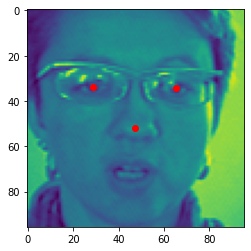

In [9]:
# Test the images and the labels
sample = 10
display_overlays(image = images[sample], data_points = labels[sample])

In [20]:
# Split the data into a train-test split
train_im, valid_im, train_lab, valid_lab = sk.train_test_split(images, labels, test_size = 0.1)

Prepare Model and Training

In [ ]:
# Test model 1: ResNet - 50

from tensorflow.keras.layers import (Input, Conv2D, GlobalAveragePooling2D, Dense)
from tensorflow.keras import Sequential

ResNet50 = Sequential(

)

def residual_block(stage):
    